In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('gender_submission.csv')


In [ ]:
#importing pandas library
import pandas as pd

#loading data
titanic = pd.read_csv('train.csv')


In [ ]:
# View first five rows of the dataset
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

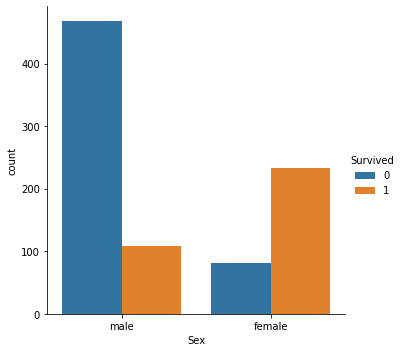

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = titanic)


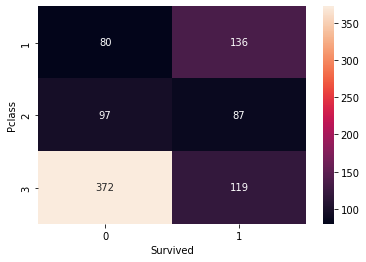

In [ ]:
# Group the dataset by Pclass and Survived and then unstack them
group = titanic.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")


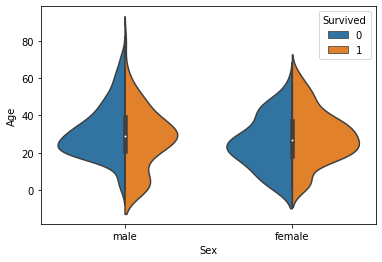

In [ ]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = titanic, split = True)


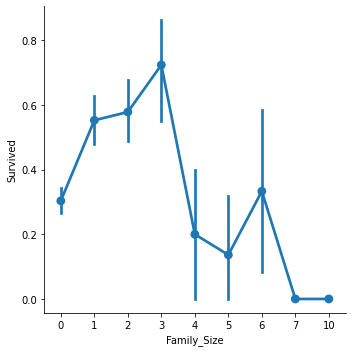

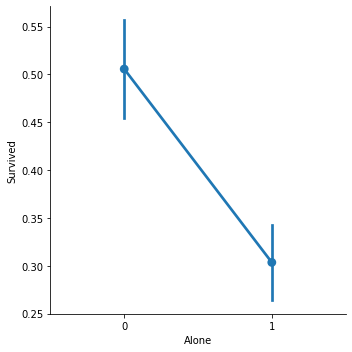

In [ ]:
# Adding a column Family_Size
titanic['Family_Size'] = 0
titanic['Family_Size'] = titanic['Parch']+titanic['SibSp']

# Adding a column Alone
titanic['Alone'] = 0
titanic.loc[titanic.Family_Size == 0, 'Alone'] = 1

# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = titanic)

# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = titanic)


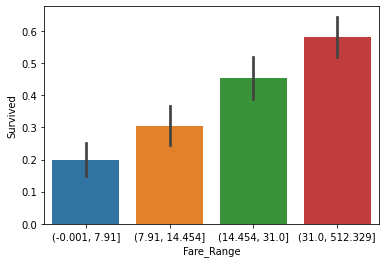

In [ ]:
# Divide Fare into 4 bins
titanic['Fare_Range'] = pd.qcut(titanic['Fare'], 4)

# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = titanic)


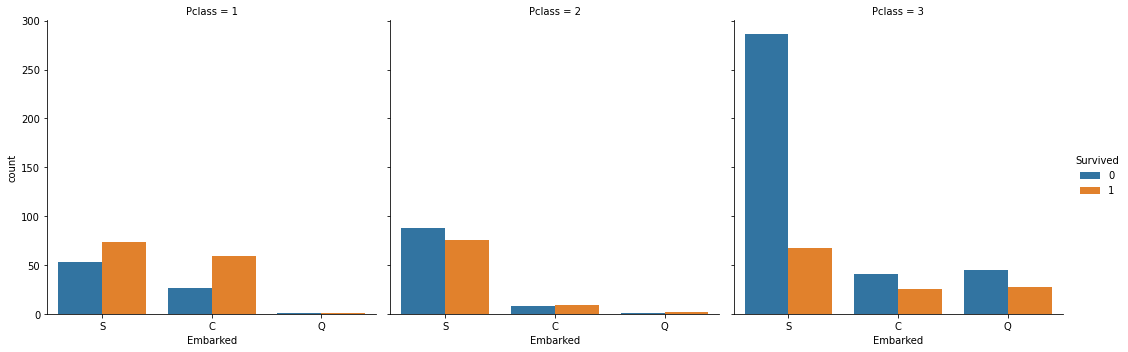

In [ ]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = titanic)
